In [1]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

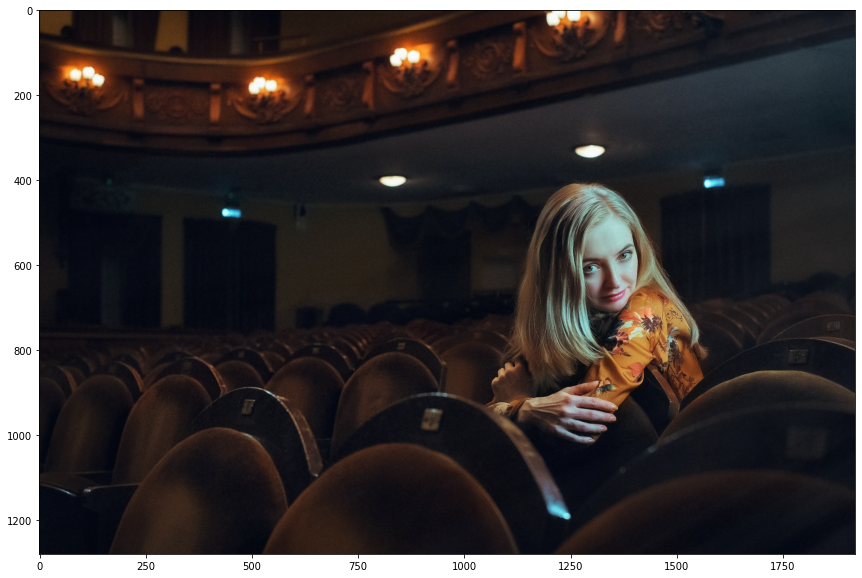

In [2]:
img = cv2.imread('01.jpg')

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

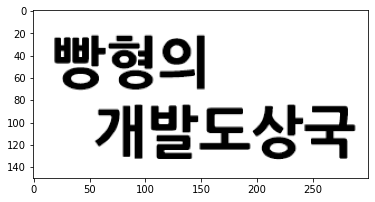

In [3]:
img_wm = cv2.imread('watermark_brad2.png')

plt.imshow(img_wm[:, :, ::-1])

In [4]:
height, width, _ = img.shape
wm_height, wm_width, _ = img_wm.shape

print(height, width)
print(wm_height, wm_width)

1280 1920
150 300


# Encode

In [5]:
img_f = np.fft.fft2(img)

print(img_f[0, 0])

[215803.    +0.j         -20198.+20964.74297481j -20198.-20964.74297481j]


In [6]:
y_random_indices, x_random_indices = list(range(height)), list(range(width))
random.seed(2021)
random.shuffle(x_random_indices)
random.shuffle(y_random_indices)

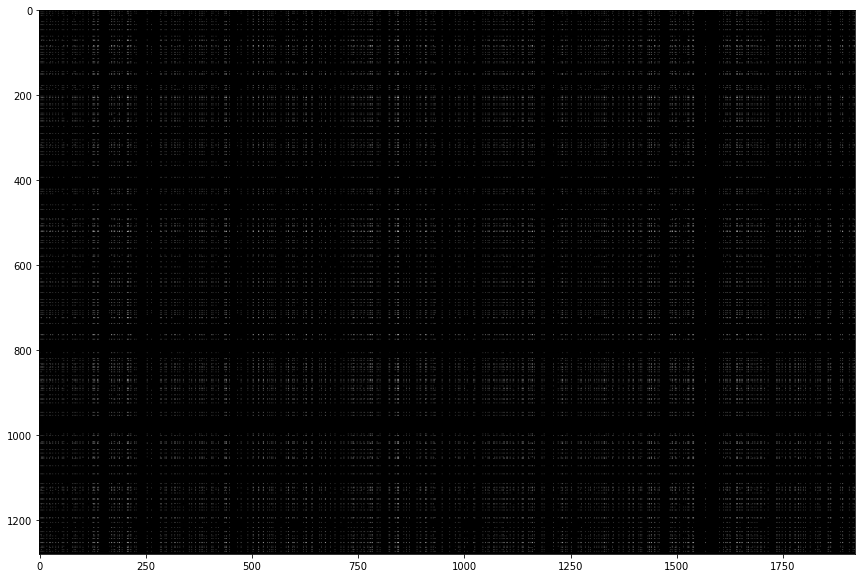

In [7]:
random_wm = np.zeros(img.shape, dtype=np.uint8)

for y in range(wm_height):
    for x in range(wm_width):
        random_wm[y_random_indices[y], x_random_indices[x]] = img_wm[y, x]

plt.figure(figsize=(16, 10))
plt.imshow(random_wm)

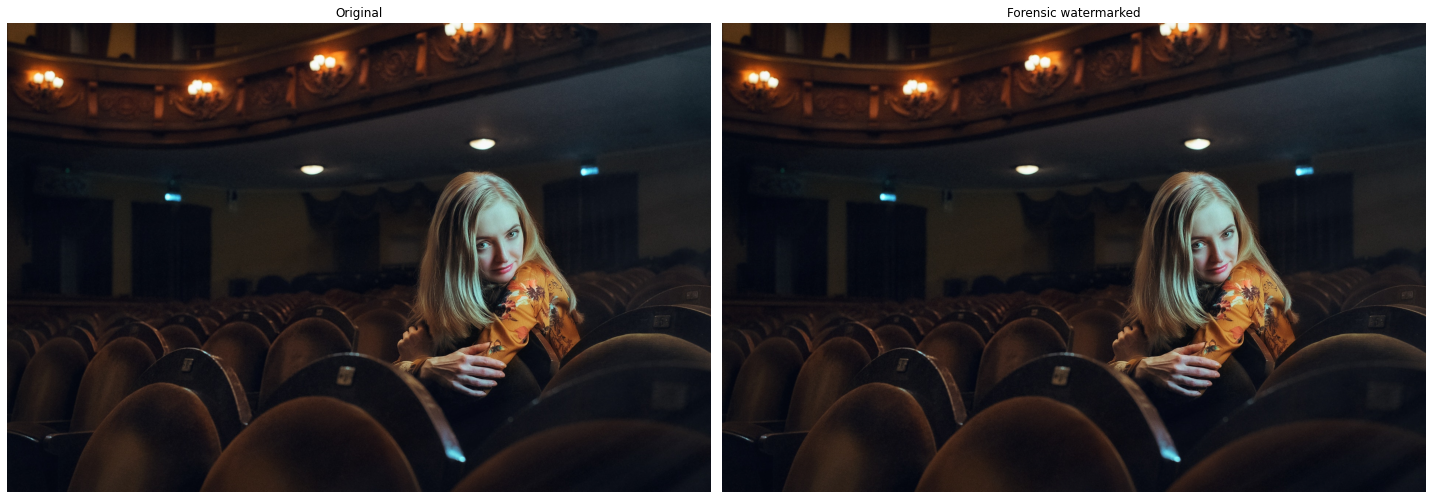

In [8]:
alpha = 5

result_f = img_f + alpha * random_wm

result = np.fft.ifft2(result_f)
result = np.real(result)
result = result.astype(np.uint8)

fig, axes = plt.subplots(1, 2, figsize=(20, 16))
axes[0].imshow(img[:, :, ::-1])
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(result[:, :, ::-1])
axes[1].set_title('Forensic watermarked')
axes[1].axis('off')
fig.tight_layout()
plt.show()

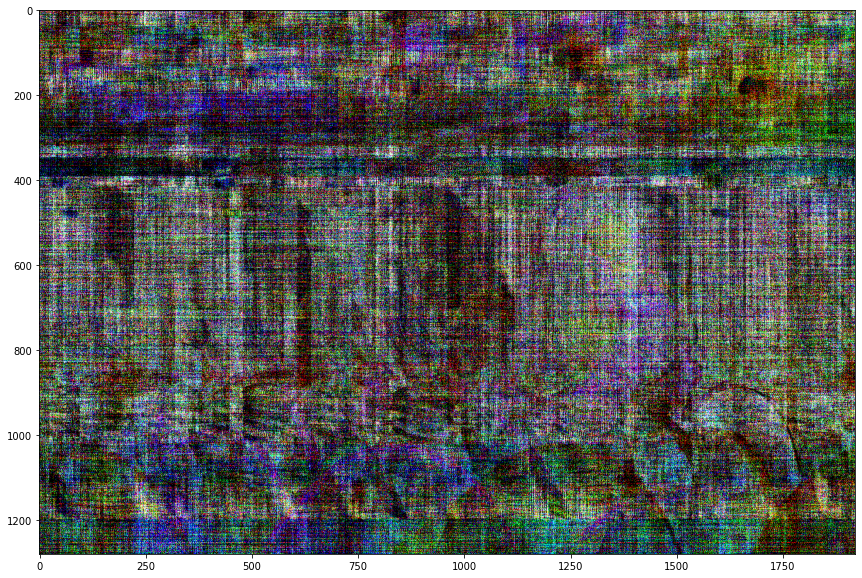

In [9]:
plt.figure(figsize=(16, 10))
plt.imshow(result - img)

# Decode

- img_ori_f: Original image 원본 이미지
- img_input_f: Captured image 불법 녹화 이미지

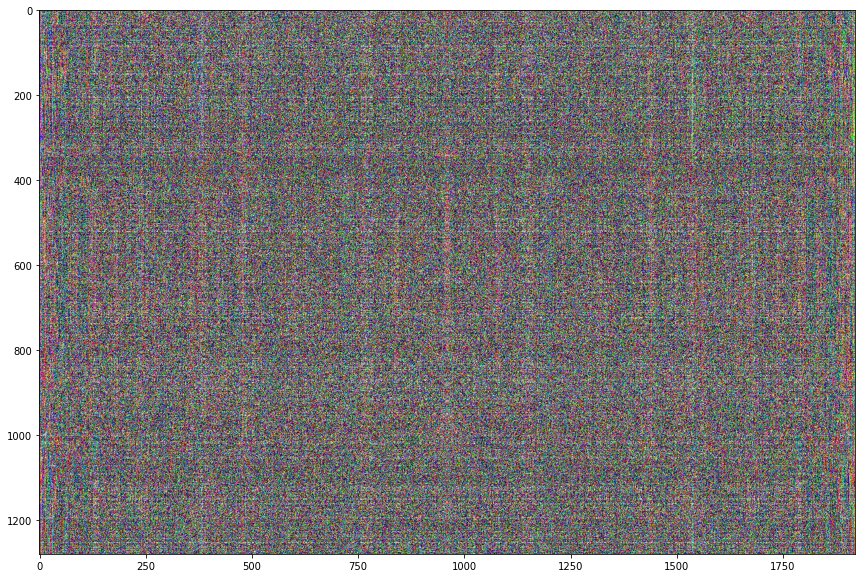

In [10]:
img_ori_f = np.fft.fft2(img)
img_input_f = np.fft.fft2(result)

watermark = (img_ori_f - img_input_f) / alpha
watermark = np.real(watermark).astype(np.uint8)

plt.figure(figsize=(16, 10))
plt.imshow(watermark)

In [11]:
y_random_indices, x_random_indices = list(range(height)), list(range(width))
random.seed(2021)
random.shuffle(x_random_indices)
random.shuffle(y_random_indices)

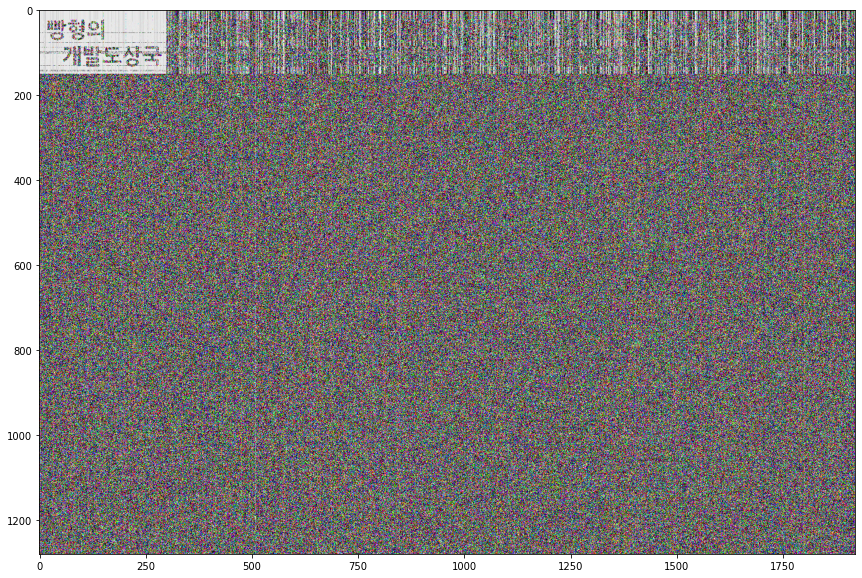

In [12]:
result2 = np.zeros(watermark.shape, dtype=np.uint8)

for y in range(height):
    for x in range(width):
        result2[y, x] = watermark[y_random_indices[y], x_random_indices[x]]

plt.figure(figsize=(16, 10))
plt.imshow(result2)

# Result

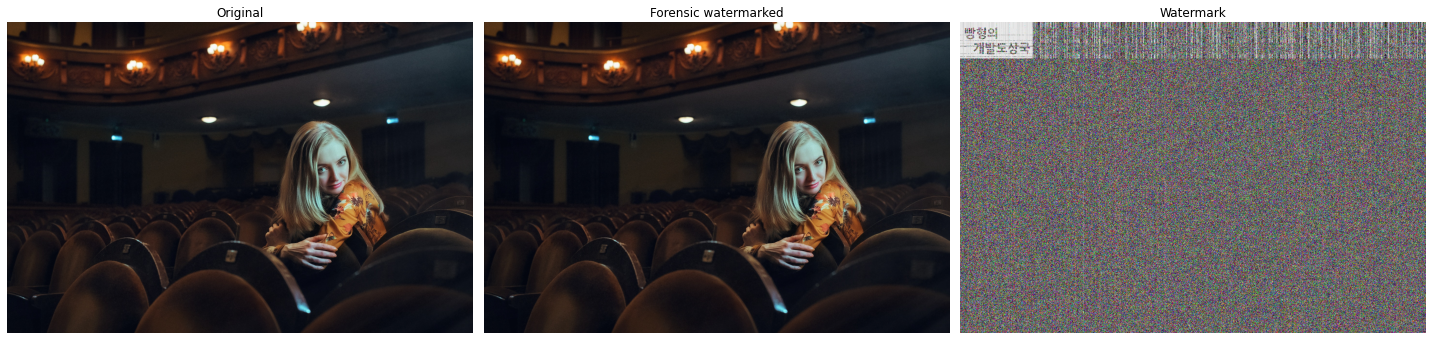

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(20, 16))
axes[0].imshow(img[:, :, ::-1])
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(result[:, :, ::-1])
axes[1].set_title('Forensic watermarked')
axes[1].axis('off')
axes[2].imshow(result2)
axes[2].set_title('Watermark')
axes[2].axis('off')
fig.tight_layout()
plt.show()